In [1]:
import torch

In [2]:
import pytorch_lightning as pl

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [65]:
from scipy.fft import fft, ifft

In [5]:
N = 10000

In [197]:
X = torch.arange(N)
X = torch.stack([
    torch.sin(2 * np.pi * (X / 100 + 30 / 360)),
    torch.sin(2 * np.pi * (X / 60 + 45 / 360)),
    torch.sin(2 * np.pi * (X / 120 + 120 / 360)),
    # torch.sin(2 * np.pi * (X / 40 + 270 / 360)),
    *[torch.randn(N) for _ in range(13)],
], dim=1) * 2 * (1 ** torch.arange(16).view(1, -1))

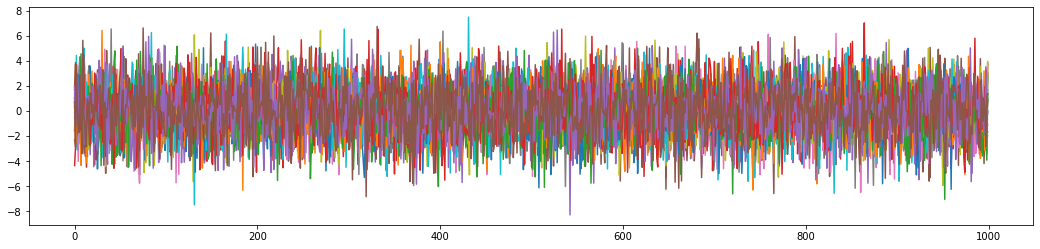

In [198]:
plt.figure(figsize=(18, 4))
plt.plot(X[:1000].numpy())
plt.show()

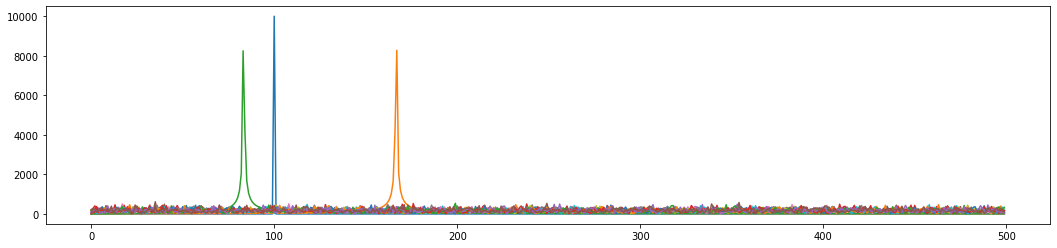

In [199]:
x_fft = fft(X.numpy(), axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_fft)[:500])
plt.show()

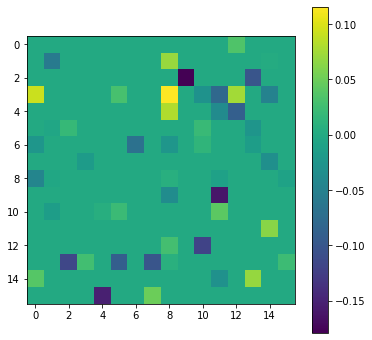

In [204]:
A_transf = torch.randn(16, 16) / 16
A_transf = A_transf * torch.bernoulli(torch.ones(16, 16) * 0.25)
plt.figure(figsize=(6, 6))
plt.imshow(A_transf.numpy())
plt.colorbar()
plt.show()

In [205]:
X_transf = torch.mm(X, A_transf)

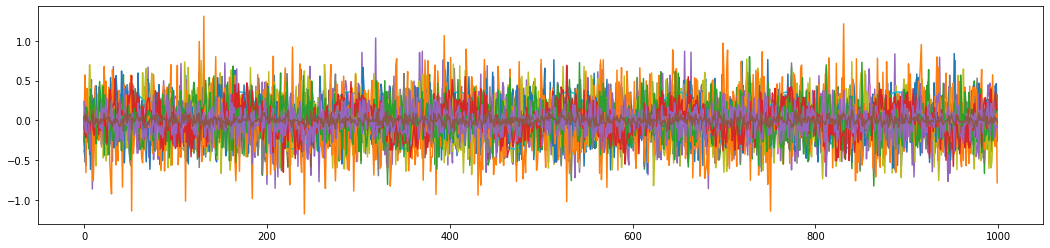

In [206]:
plt.figure(figsize=(18, 4))
plt.plot(X_transf[:1000].numpy())
plt.show()

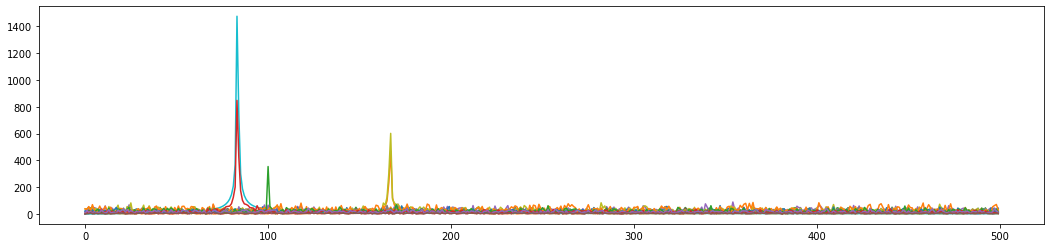

In [207]:
x_transf_fft = fft(X_transf.numpy(), axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_transf_fft)[:500])
plt.show()

In [208]:
from sklearn.decomposition import PCA

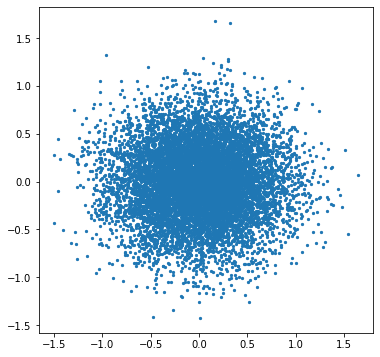

In [209]:
pca = PCA(16)
x_pca = pca.fit_transform(X_transf.numpy())
plt.figure(figsize=(6, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], s=5)
plt.show()

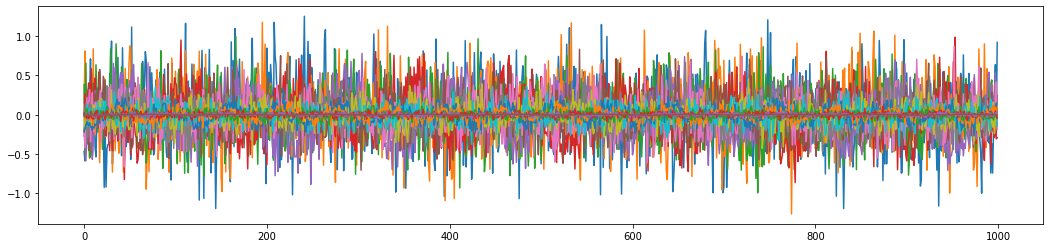

In [212]:
plt.figure(figsize=(18, 4))
plt.plot(x_pca[:1000])
plt.show()

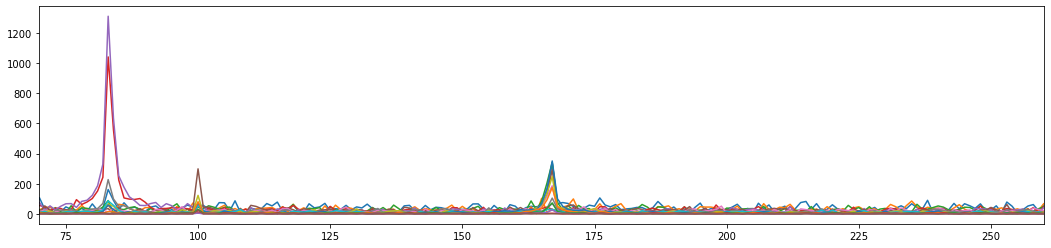

In [213]:
x_pca_fft = fft(x_pca, axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_pca_fft)[:300])
plt.xlim(70, 260)
plt.show()

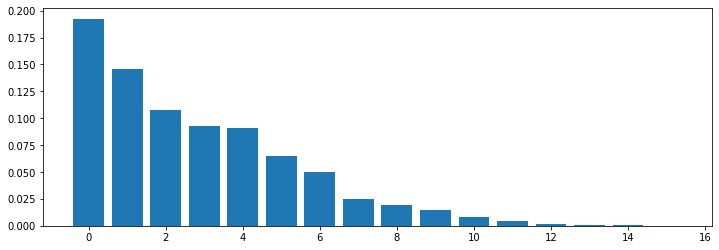

In [214]:
plt.figure(figsize=(12, 4))
plt.bar(np.arange(16), pca.explained_variance_)
plt.show()

In [215]:
import sys

In [216]:
sys.path.append('../../')

In [217]:
import dltranz.lightning_modules.stream_encoder as se

In [218]:
stream_encoder = se.StreamEncoder(
    encoder_x2z=torch.nn.Linear(16, 16),
    history_size=50,
    predict_range=np.arange(10),
    predict_w=np.ones(10) / 10,
    z_channels=16,
    c_channels=16,
    var_gamma_z=0.5,
    var_gamma_c=0.3,
    lr=0.003,
    weight_decay=0.0001,
    step_size=1,
    gamma=0.9,
    cpc_w=0.1,
    cov_z_w=1.0,
    var_z_w=1.0,
    cov_c_w=1.0,
    var_c_w=1.0,
)

In [219]:
l3dt = se.Loader3DTensor(stream_encoder)
dl_train = l3dt.get_train_dataloader(X_transf[:N // 2].unsqueeze(0), 64, 8)
dl_valid = l3dt.get_valid_dataloader(X_transf[N // 2:].unsqueeze(0), 1, 0)

In [220]:
trainer = trainer = pl.Trainer(
    gpus=[3],
    max_epochs=50,
    log_every_n_steps=10,
    progress_bar_refresh_rate=50, weights_summary=None,
    logger=pl.loggers.TensorBoardLogger(
        save_dir='lightning_logs/',
        default_hp_metric=False,
    )
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [221]:
trainer.fit(stream_encoder, train_dataloader=dl_train, val_dataloaders=dl_valid)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Validation sanity check: 0it [00:00, ?it/s]

/mnt2/kireev/pipenv_envs/pytorch-lifestream-bcSZKFyz/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [222]:
with torch.no_grad():
    Z, C = stream_encoder(X_transf.unsqueeze(0))
    P = stream_encoder.lin_predictors_c2p[0](C)

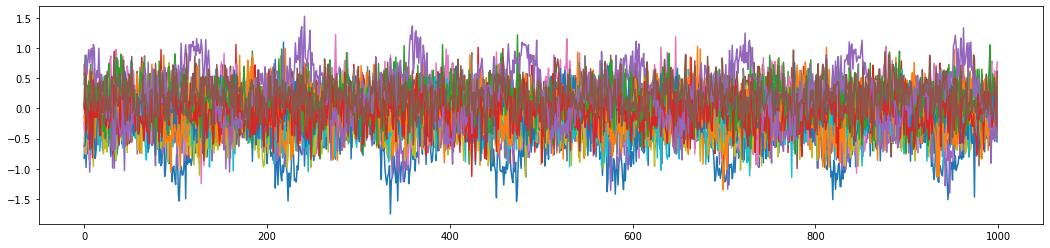

In [223]:
plt.figure(figsize=(18, 4))
plt.plot(Z[0, :1000].numpy())
plt.show()

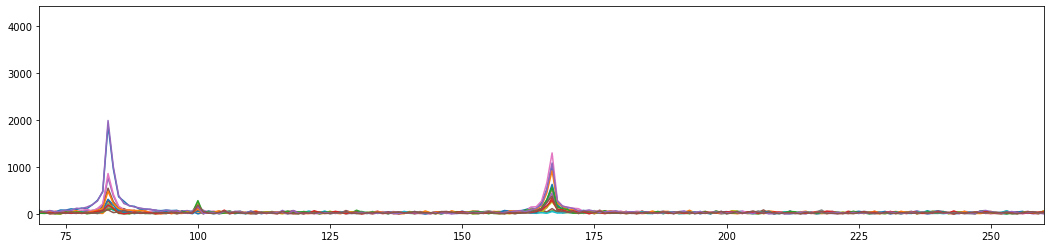

In [224]:
x_pca_fft = fft(Z[0].numpy(), axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_pca_fft)[:300])
plt.xlim(70, 260)
plt.show()

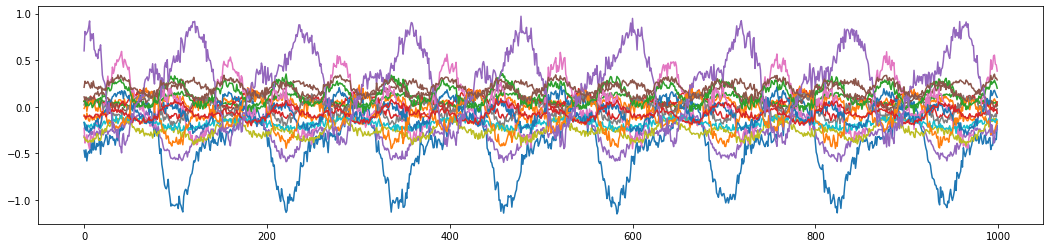

In [225]:
plt.figure(figsize=(18, 4))
plt.plot(P[0, :1000].numpy())
plt.show()

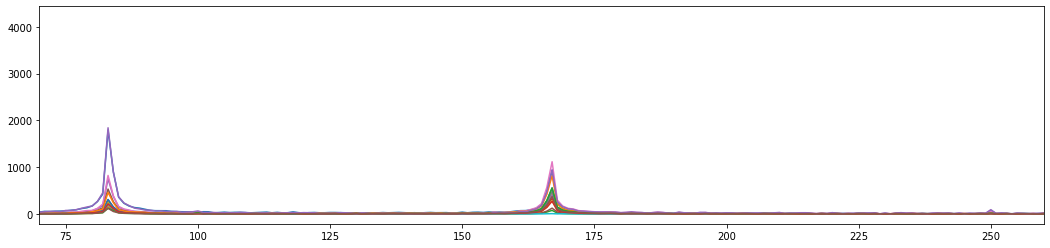

In [226]:
x_pca_fft = fft(P[0].numpy(), axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_pca_fft)[:300])
plt.xlim(70, 260)
plt.show()

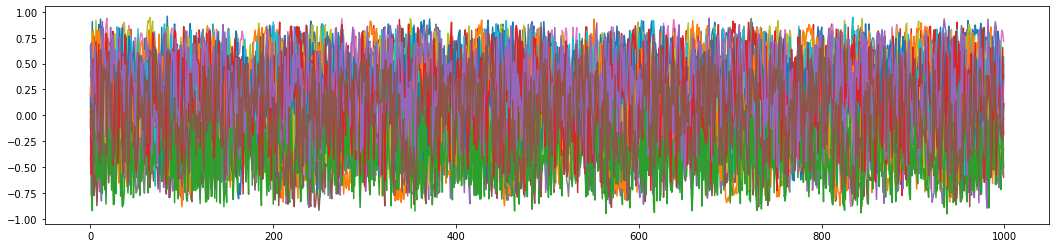

In [227]:
plt.figure(figsize=(18, 4))
plt.plot(C[0, :1000].numpy())
plt.show()

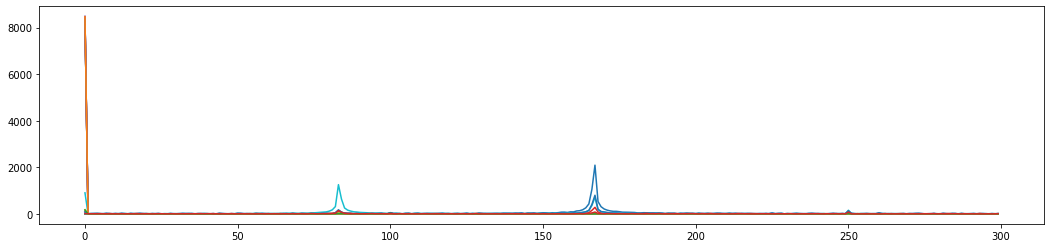

In [371]:
x_pca_fft = fft(C[0].numpy(), axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_pca_fft)[:300])
# plt.xlim(70, 260)
plt.show()

In [358]:
stream_encoder = se.StreamEncoder(
    encoder_x2z=torch.nn.Sequential(
        torch.nn.Linear(16, 16),
        se.TBatchNorm(16),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(16, 16),
    ),
    history_size=50,
    predict_range=np.arange(10),
    predict_w=np.ones(10) / 10,
    z_channels=16,
    c_channels=24,
    var_gamma_z=0.5,
    var_gamma_c=0.3,
    lr=0.003,
    weight_decay=0.001,
    step_size=1,
    gamma=0.9,
    cpc_w=1.3,
    cov_z_w=0.1,
    var_z_w=1.0,
    cov_c_w=1.0,
    var_c_w=1.0,
)

In [359]:
l3dt = se.Loader3DTensor(stream_encoder)
dl_train = l3dt.get_train_dataloader(X_transf[:N // 2].unsqueeze(0), 64, 8)
dl_valid = l3dt.get_valid_dataloader(X_transf[N // 2:].unsqueeze(0), 1, 0)

In [360]:
trainer = trainer = pl.Trainer(
    gpus=[3],
    max_epochs=50,
    log_every_n_steps=10,
    progress_bar_refresh_rate=50, weights_summary=None,
    logger=pl.loggers.TensorBoardLogger(
        save_dir='lightning_logs/',
        default_hp_metric=False,
    )
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [361]:
trainer.fit(stream_encoder, train_dataloader=dl_train, val_dataloaders=dl_valid)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Validation sanity check: 0it [00:00, ?it/s]

/mnt2/kireev/pipenv_envs/pytorch-lifestream-bcSZKFyz/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [362]:
with torch.no_grad():
    Z, C = stream_encoder(X_transf.unsqueeze(0))
    P = stream_encoder.lin_predictors_c2p[0](C)

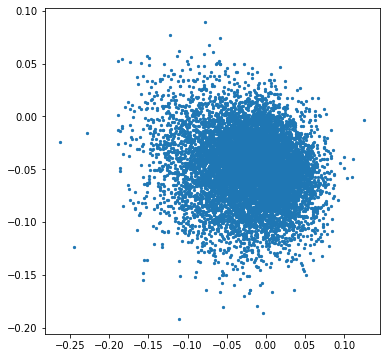

In [363]:
plt.figure(figsize=(6, 6))
plt.scatter(Z[0, :, 0].numpy(), Z[0, :, 1].numpy(), s=5)
plt.show()

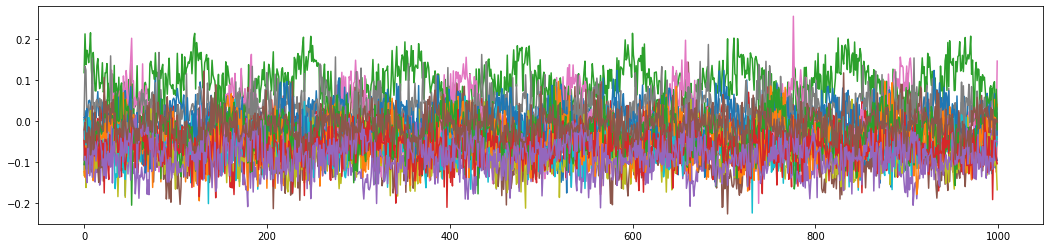

In [364]:
plt.figure(figsize=(18, 4))
plt.plot(Z[0, :1000].numpy())
plt.show()

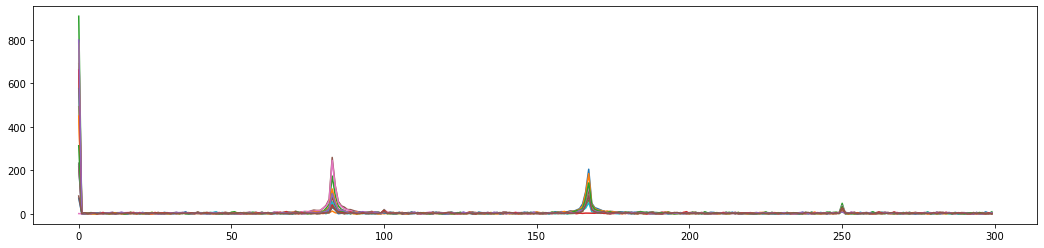

In [370]:
x_pca_fft = fft(Z[0].numpy(), axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_pca_fft)[:300])
# plt.xlim(70, 260)
plt.show()

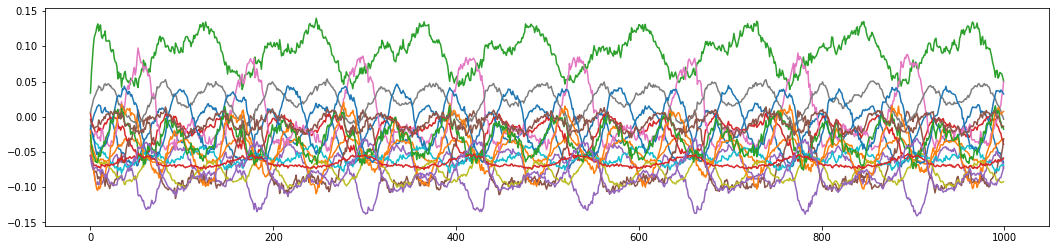

In [366]:
plt.figure(figsize=(18, 4))
plt.plot(P[0, :1000].numpy())
plt.show()

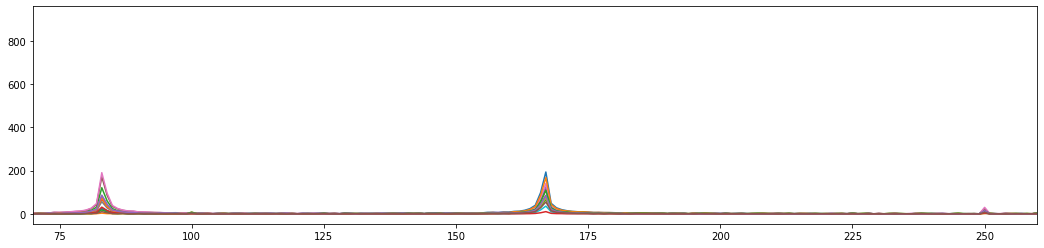

In [367]:
x_pca_fft = fft(P[0].numpy(), axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_pca_fft)[:300])
plt.xlim(70, 260)
plt.show()

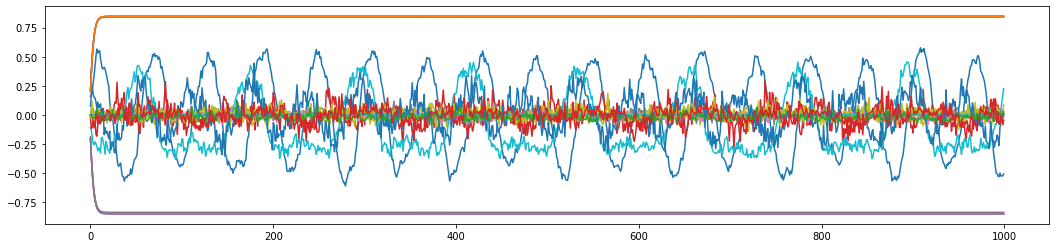

In [368]:
plt.figure(figsize=(18, 4))
plt.plot(C[0, :1000].numpy())
plt.show()

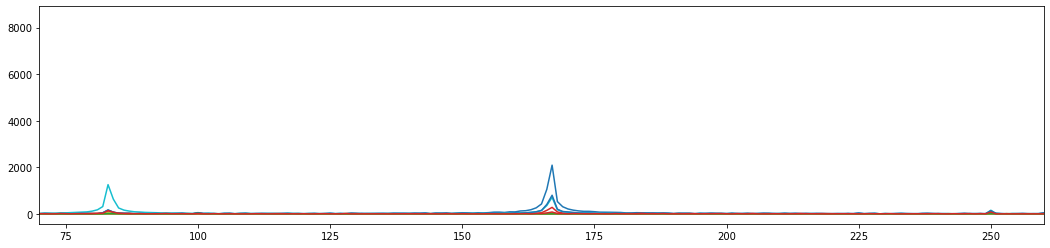

In [369]:
x_pca_fft = fft(C[0].numpy(), axis=0)
plt.figure(figsize=(18, 4))
plt.plot(np.abs(x_pca_fft)[:300])
plt.xlim(70, 260)
plt.show()